### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly_express as px

In [2]:
pd.set_option('display.max_columns', None)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

One immediate find is that 99.1% of "car" column is `NaN`, so we can safely drop it. Also, there are some entries that don't have data for number of times they go to a bar, coffee house, take-out, and restaraunt (both <$20 and $20-$50). Also, column for passengers is named `passanger`. However, I decided that for compatibility it is better to leave it unchanged.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Since `car` column is 99.1% `NaN` and we aren't given an explanation to it, I think that the best option is to drop it entirely - especially given that its distribution is 21-22 across all 5 non-NaN categories. All other problematic data columns are described as "number of times user [does something]", so I think it is okay to replace all `NaN` values with 0s. As you can see, after doing this, no data is missing

In [7]:
data = data.drop(columns="car")

In [8]:
data = data.fillna("never")

In [9]:
data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
def acceptance(df, num=False):
    """Calculates acceptance of coupons over a given dataframe and returns it in form of xx.xx%"""
    # Changes behavior if we need a number or a string answer
    if(num == False):
        return str(np.format_float_positional(\
            # Formula for acceptance, in percent
            df[ df["Y"] == 1 ]["Y"].sum() / len(df["Y"]) * 100\
                , precision=2)) + "%"
    else:
        return df[ df["Y"] == 1 ]["Y"].sum() / len(df["Y"]) * 100

In [11]:
acceptance(data)

'56.84%'

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Number of coupons issued')

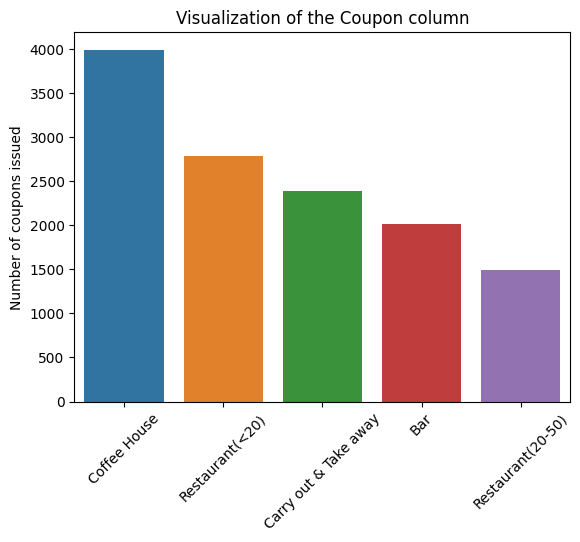

In [12]:
sns.barplot(data=data, x=data.coupon.value_counts().index, y=data.coupon.value_counts())
plt.xticks(rotation=45)
plt.title("Visualization of the Coupon column")
plt.ylabel("Number of coupons issued")

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Count of temperatures')

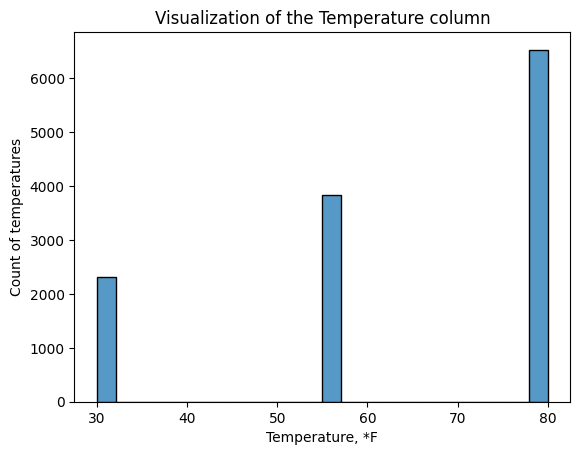

In [13]:
sns.histplot(data=data, x="temperature")
plt.title("Visualization of the Temperature column")
plt.xlabel("Temperature, *F")
plt.ylabel("Count of temperatures")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
df_bar_coupon = data[ data["coupon"] == "Bar" ]

2. What proportion of bar coupons were accepted?


In [15]:
acceptance(df_bar_coupon)

'41.00%'

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
group1 = df_bar_coupon.query("Bar in ('never', 'less1', '1~3')")
group2 = df_bar_coupon.query("Bar in ('4~8', 'gt8')")
print("Acceptance of rare visiters: " + acceptance(group1))
print("Acceptance of frequent visiters: " + acceptance(group2))

Acceptance of rare visiters: 37.07%
Acceptance of frequent visiters: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
group1 = df_bar_coupon.query("Bar not in ('never', 'less1') and age not in ('below21', '21')")
group2 = df_bar_coupon.query("Bar in ('never', 'less1') or age in ('below21', '21')")

print("Acceptance of (>1 a month and age>25): " + acceptance(group1))
print("Acceptance of everyone else: " + acceptance(group2))

Acceptance of (>1 a month and age>25): 69.52%
Acceptance of everyone else: 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
group1 = df_bar_coupon.query("Bar not in ('never', 'less1') and passanger != 'Kid(s)' and occupation != 'Farming Fishing & Forestry'")
group2 = df_bar_coupon.query("Bar in ('never', 'less1') or passanger == 'Kid(s)' or occupation == 'Farming Fishing & Forestry'")

print("Acceptance of those drivers: " + acceptance(group1))
print("Acceptance of everyone else: " + acceptance(group2))

Acceptance of those drivers: 71.32%
Acceptance of everyone else: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [19]:
group1 = df_bar_coupon.query("Bar not in ('never', 'less1') and passanger != 'Kid(s)' and maritalStatus != 'Widowed'")
group2 = df_bar_coupon.query("Bar not in ('never', 'less1') and age in ('below21', '21', '26')")
group3 = df_bar_coupon.query("RestaurantLessThan20 in ('4~8', 'gt8') and income in ('Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999')")

In [20]:
print("Acceptance of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: " + acceptance(group1))
print("Acceptance of drivers who go to bars more than once a month and are under the age of 30: " + acceptance(group2))
print("Acceptance of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: " + acceptance(group3))

Acceptance of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.32%
Acceptance of drivers who go to bars more than once a month and are under the age of 30: 72.17%
Acceptance of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Findings**

They are regulars (go to a bar at least once a month, often more. People who don't go there see dramatic drop in acceptance level), belong to lower income parts of the society, and sometimes (but not always) have some adult friends with them. Naturally, younger (<21, 21-26) people are heavily affected by the drinking ban, which means they are less likely to accept a coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's take a look into the takeaway coupons. I didn't use visualizations for every single question because questions with two options are clear without them.

In [21]:
df_take_coupon = data.query("coupon == 'Carry out & Take away'")

In [22]:
print("Acceptance of take-out coupons in general: " + acceptance(df_take_coupon))

Acceptance of take-out coupons in general: 73.55%


Let's check if regulars accept more or less coupons

In [23]:
# Acceptance over regulars (take away <1, >1, and >3 times a month)
group1 = df_take_coupon.query("CarryAway in ('never', 'less1')")
group2 = df_take_coupon.query("CarryAway not in ('never', 'less1')")
group3 = df_take_coupon.query("CarryAway in ('4~8', 'gt8')")

print("Acceptance of people who never buy take-out: " + acceptance(df_take_coupon.query("CarryAway == 'never'")))
print("Acceptance of rare take-out buyers: " + acceptance(group1))
print("Acceptance of frequent take-out buyers: " + acceptance(group2))
print("Acceptance of regular take-out buyers: " + acceptance(group3))

Acceptance of people who never buy take-out: 79.63%
Acceptance of rare take-out buyers: 69.53%
Acceptance of frequent take-out buyers: 74.37%
Acceptance of regular take-out buyers: 74.96%


Text(0, 0.5, 'Acceptance')

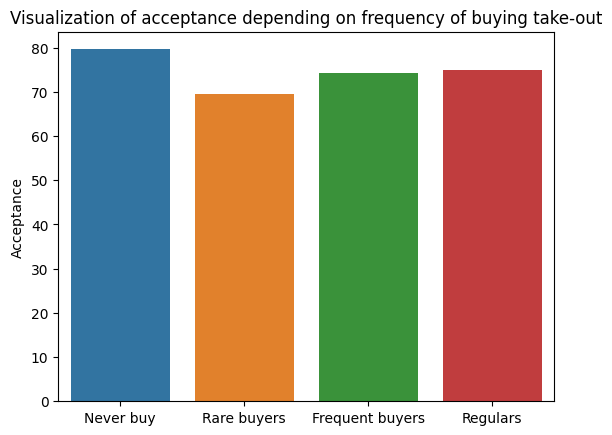

In [24]:
sns.barplot(x=\
            ["Never buy", "Rare buyers", "Frequent buyers", "Regulars"], y=\
                [acceptance(df_take_coupon.query("CarryAway == 'never'"), num=True), acceptance(group1, num=True), acceptance(group2, num=True), acceptance(group3, num=True)])
plt.title("Visualization of acceptance depending on frequency of buying take-out")
plt.ylabel("Acceptance")

Are 2 hours coupons more or less popular than 1 day ones?

In [25]:
# Short vs long term coupons
group1 = df_take_coupon.query("expiration == '2h'")
group2 = df_take_coupon.query("expiration == '1d'")

print("Acceptance of short-term coupons: " + acceptance(group1))
print("Acceptance of long-term coupons: " + acceptance(group2))

Acceptance of short-term coupons: 66.38%
Acceptance of long-term coupons: 78.16%


How does it depend on the income and presence of children in the family?

In [26]:
# Income
group1 = df_take_coupon.query("income in ('Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999')")
group2 = df_take_coupon.query("income in ('$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More')")

print("Acceptance of low income buyers: " + acceptance(group1))
print("Acceptance of high income buyers: " + acceptance(group2))

Acceptance of low income buyers: 74.82%
Acceptance of high income buyers: 72.08%


In [27]:
# Children?

group1 = df_take_coupon.query("has_children  == 0")
group2 = df_take_coupon.query("has_children == 1")

print("Acceptance of people with children: " + acceptance(group1))
print("Acceptance of people without children: " + acceptance(group2))

Acceptance of people with children: 73.23%
Acceptance of people without children: 73.98%


What about marital status?

In [28]:
# Family?

group1 = df_take_coupon.query("maritalStatus == 'Single'")
group2 = df_take_coupon.query("maritalStatus == 'Married partner'")
group3 = df_take_coupon.query("maritalStatus == 'Unmarried partner'")
group4 = df_take_coupon.query("maritalStatus == 'Divorced'")
group5 = df_take_coupon.query("maritalStatus == 'Widowed'")

print("Acceptance of single people: " + acceptance(group1))
print("Acceptance of married people: " + acceptance(group2))
print("Acceptance of dating people: " + acceptance(group3))
print("Acceptance of divorced people: " + acceptance(group4))
print("Acceptance of widowed people: " + acceptance(group5))

Acceptance of single people: 74.68%
Acceptance of married people: 73.17%
Acceptance of dating people: 71.39%
Acceptance of divorced people: 72.22%
Acceptance of widowed people: 84.62%


Text(0, 0.5, 'Acceptance')

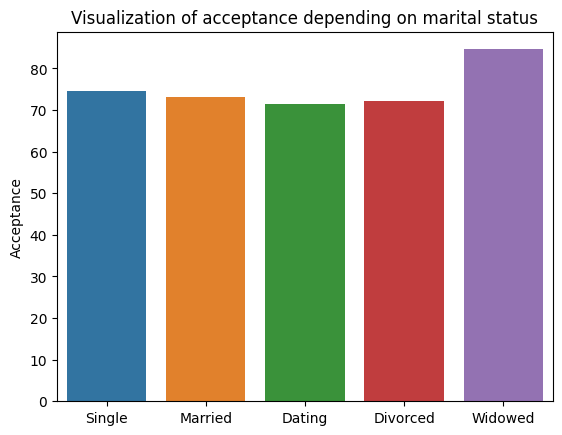

In [29]:
sns.barplot(x=\
            ["Single", "Married", "Dating", "Divorced", "Widowed"], y=\
                [acceptance(group1, num=True), acceptance(group2, num=True), acceptance(group3, num=True), acceptance(group4, num=True), acceptance(group5, num=True)])
plt.title("Visualization of acceptance depending on marital status")
plt.ylabel("Acceptance")

How does acceptance rate depend on the age?

In [30]:
# Age?

group1 = df_take_coupon.query("age in ('below21', '21', '26')")
group2 = df_take_coupon.query("age in ('31', '36')")
group3 = df_take_coupon.query("age in ('41', '46', '50plus')")

print("Acceptance of young people: " + acceptance(group1))
print("Acceptance of middle aged people: " + acceptance(group2))
print("Acceptance of seniors: " + acceptance(group3))

Acceptance of young people: 73.55%
Acceptance of middle aged people: 72.16%
Acceptance of seniors: 74.85%


Text(0, 0.5, 'Acceptance')

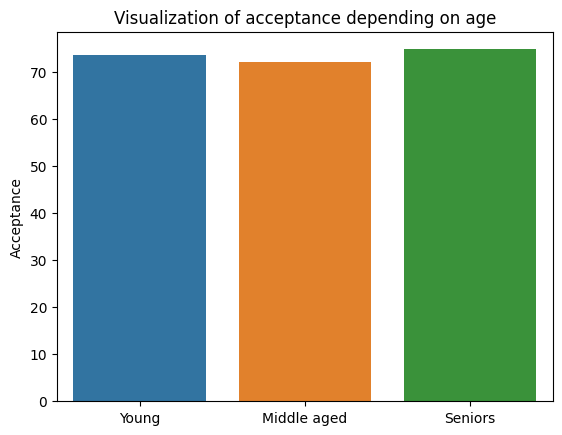

In [31]:
sns.barplot(x=\
            ["Young", "Middle aged", "Seniors"], y=\
                [acceptance(group1, num=True), acceptance(group2, num=True), acceptance(group3, num=True)])
plt.title("Visualization of acceptance depending on age")
plt.ylabel("Acceptance")

**Findings**

Overall, takeout coupons are very popular among the population, holding steadily in 70-75% range for most of my queries. Somewhat notable trends I saw here are (surprising) preference by people who normally don't order takeout (79% acceptance for those who "never" order it), obvious preference towards 1 day coupons (but 2h ones were still quite popular), obvious (+10% compared to other groups) preference by the widowed people, with single being the next accepting group at 74.6%, small preference towards people with sub-50K income (+2.8%) and lack of distinction by presence of kids.

However, as already said, takeout coupons are popular across entire population of this survey, so it is hard to find anything larger than couple percent difference.

## Next steps
Possible next steps include finding similar patterns for other types of coupons, as well as expanding the research to other columns (e.g. range and direction, job, education, etc).